The harmonic oscillator is one of the fundamental systems that appear in everyday life.

Its equation is:

$$
\frac{d^2x}{dt^2} +\omega_0^2 x(t)=0
$$

In this post, we will solve this equation for different excitations (harmonic motion) and then, using Fourier synthesis, solve different time excitations.

# Harmonic solution 

Suppose that the harmonic oscillator is excited by a force such as:

$$
\frac{d^2x}{dt^2} + \frac{\omega_0}{Q} \frac{d x}{dt} + \omega_0^2 x(t)= \omega_0^2 a \cos{ \omega t }
$$

We can solve this equation for any frequency in the Fourier domain:

$$
-\omega^2 X e^{j \omega t} + \frac{\omega_0}{Q} j \omega X e^{j \omega t}   + \omega_0^2 X e^{j \omega t} = \omega_0^2 a e^{j \omega t}
$$

(I cheated a little bit because the cosinus function is not exactly equal to what I wrote above)

This allows us to compute the solution at any frequency with the following formula:

$$
X = \frac{\omega_0^2}{\omega_0^2 - \omega^2 + j \frac{\omega \omega_0}{Q}} a
$$

Let's look at this in practice:

In [1]:
import numpy as np

In [2]:
t = np.linspace(0, 10, 200)
omega_0 = 5
Q = 0.1
omega = 0.2
a = 1

In [8]:
m = 1
k = 25
omega_0 / 50

0.1

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
from ipywidgets import interact

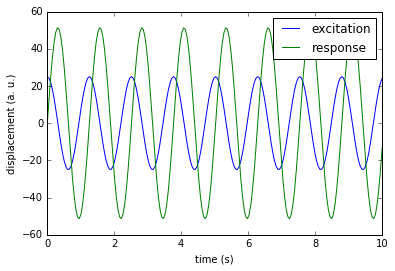

In [5]:
@interact
def plot_harmonic_solution(omega = (0.1, 10, 0.1), Q=(0.1, 100, 0.1)):
    excitation = np.real(omega_0**2 * a * np.exp(1j * omega * t))
    response = np.real(omega_0**2 * a / (omega_0**2 - omega**2 + 1j * omega * omega_0 / Q)  * np.exp(1j * omega * t))
    plt.plot(t, excitation, label='excitation')    
    plt.plot(t, response, label='response')
    plt.legend()
    plt.xlabel('time (s)')
    plt.ylabel('displacement (a. u.)')

Observations:

- there's a resonance a $\omega = \omega_0$
- the higher the Q value, the higher the response amplitude
- the higher the Q value, the narrower the frequency range of the resonance
- phase :
    - high Q value: in phase before the resonance, $\pi$ after the resonance, with a sudden shift
    - low Q value: progressive shift from 0 to $2 \pi$ far above resonance

Actually, we can sum this observation up with some animations. 

First, let's start with low Q:

  warn(skimage_deprecation('The `skimage.filter` module has been renamed '



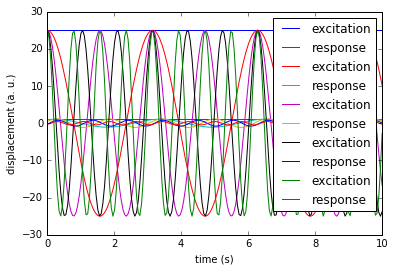

In [6]:
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

duration = 5
fig_mpl, ax = plt.subplots(1, figsize=(5,3), facecolor='white')

def make_frame_mpl(t):
    ax.cla()
    alpha = t / duration
    plot_harmonic_solution(10 * alpha, 1)
    return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation = mpy.VideoClip(make_frame_mpl, duration=duration)
plt.close()
mpy.ipython_display(animation, fps=1, codec='libx264')

In [7]:
animation.write_videofile()

TypeError: write_videofile() missing 1 required positional argument: 'filename'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



# DRAW A FIGURE WITH MATPLOTLIB

duration = 2

fig_mpl, ax = plt.subplots(1,figsize=(5,3), facecolor='white')
xx = np.linspace(-2,2,200) # the x vector
zz = lambda d: np.sinc(xx**2)+np.sin(xx+d) # the (changing) z vector
ax.set_title("Elevation in y=0")
ax.set_ylim(-1.5,2.5)
line, = ax.plot(xx, zz(0), lw=3)

# ANIMATE WITH MOVIEPY (UPDATE THE CURVE FOR EACH t). MAKE A GIF.

def make_frame_mpl(t):
    line.set_ydata( zz(2*np.pi*t/duration))  # <= Update the curve
    return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation =mpy.VideoClip(make_frame_mpl, duration=duration)
animation.write_gif("sinc_mpl.gif", fps=20)

# Bibliography 

A good reference on this topic (in French) is here [http://www.matthieurigaut.net/public/sup/meca/cours_meca03_prof.pdf](http://www.matthieurigaut.net/public/sup/meca/cours_meca03_prof.pdf).